# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Homework Assignment #4 submission</b></u>

### Student Name: HUY NGUYEN
### Student ID: 015207465
### Email address: huy.l.nguyen@sjsu.edu
### Reference:
### https://scikit-learn.org/stable/tutorial/statistical_inference/model_selection.html
### https://scikit-learn.org/stable/modules/cross_validation.html
### https://intellipaat.com/community/12741/sklearn-metrics-for-multiclass-classification
### https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

##  <u>Solution</u>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

In [42]:
dataSet = pd.read_csv('homework4_input_data.csv')
dataSet.head()

,id,ASS1,SPX,C6orf141,SP5,SP6,ITGA8,ATP2A1,ATP2A3,ITGA2,...,IKZF1,SLC14A1,TCEAL2,TCEAL7,TCEAL5,VCAN,CDR1,KRBOX1,SELL,Class
0,TCGA-AB-2828-03,3.935027,0.523329,0.0,0.000000,0.102277,2.686908,2.837357,7.444575,2.246715,...,8.972232,1.560704,0.000000,0.00000,0.0,11.189255,5.866117,0.000000,7.560923,Leukemia
1,TCGA-AB-2846-03,3.372801,0.000000,0.0,0.000000,0.116270,2.083429,5.567935,8.361999,3.626850,...,8.662337,2.509522,0.000000,0.00000,0.0,9.472547,6.514825,0.289298,8.023838,Leukemia
2,TCGA-AB-2870-03,4.198301,0.000000,0.0,0.000000,0.249176,1.546059,6.605116,9.138359,2.858430,...,8.848274,3.137405,0.185980,0.00000,0.0,9.710047,0.000000,0.000000,8.031553,Leukemia
3,TCGA-AB-2872-03,4.115014,0.000000,0.0,0.222018,0.632254,2.158989,6.858708,9.201254,2.295229,...,7.730065,3.087055,0.380857,0.23682,0.0,6.085074,6.012453,0.411678,5.186830,Leukemia
4,TCGA-AB-2881-03,3.662169,0.467823,0.0,0.000000,0.000000,1.183388,5.567935,9.040883,1.815837,...,8.414421,2.683150,0.176611,0.00000,0.0,8.203471,5.718898,0.000000,8.031553,Leukemia


In [43]:
pca = PCA(n_components=2)


Y = dataSet['Class']
X = dataSet.drop(['id'], axis =1).drop(['Class'], axis =1)
x = X.values


Principal_Component = pca.fit_transform(x)

Principal_ComponentDf = pd.DataFrame(data = Principal_Component
             , columns = ['First Principal Component', 'Second Principal Component'])

print(Principal_ComponentDf)
print(Y)

      First Principal Component  Second Principal Component
0                     82.045989                   46.713045
1                     76.722515                   37.919089
2                     76.643204                   39.867660
3                     74.817222                   36.351110
4                     79.694762                   43.781024
...                         ...                         ...
4331                  -0.807812                  -18.340427
4332                  26.635546                    6.047577
4333                  -6.453130                   -2.468526
4334                   1.549730                    3.374944
4335                   9.115588                    9.490036

[4336 rows x 2 columns]
0       Leukemia
1       Leukemia
2       Leukemia
3       Leukemia
4       Leukemia
          ...   
4331     Uterine
4332     Uterine
4333     Uterine
4334     Uterine
4335     Uterine
Name: Class, Length: 4336, dtype: object


In [44]:
colors = {"Breast": '#4287f5',
 "Bladder": '#19c5e3',
 "Colon": '#80d941',
 "Glioblastoma": '#179933',
 "Head&Neck": '#f07e78',
 "Kidney": '#f01e13',
 "Leukemia": '#f0841f',
 "LungAdeno": '#db5209',
 "LungSquamous": '#ce8ced',
 "Ovarian": '#551075',
 "Rectal": '#e3d329',
 "Uterine": '#cc3423'} 

finalDf = pd.concat([principalDf, Y], axis = 1)

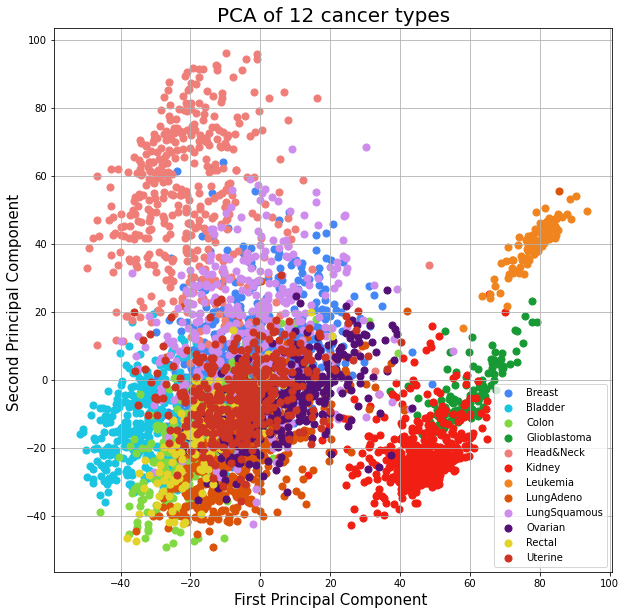

In [50]:


fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('PCA of 12 cancer types', fontsize = 20)
for target, color in colors.items():
    indicesToKeep = Y == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(colors.keys())
ax.grid()


# Data preprocessing

In [16]:

scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_rescaled, Y, test_size=0.2, random_state=0,stratify=Y)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((3468, 3000), (3468,), (868, 3000), (868,))

# Build an SVM model
# Reporting/printing 5-fold cross-validation results 

In [29]:
model = SVC(kernel='linear', C=1, random_state=42)
model.fit(X_train,Y_train)

accuracies = cross_val_score(model, X_train, Y_train, cv=5)

print("Individual cross-validation  accuracies: ",accuracies)
print("Mean cross validation accuracy: " + str(accuracies.mean()))



Individual cross-validation  accuracies:  [0.96541787 0.96541787 0.9610951  0.96825397 0.96969697]
Mean cross validation accuracy: 0.9659763547371616


# Perform systematic grid search for the regularization parameter that maximizes model accuracy

In [30]:
c = np.logspace(start = -15, stop = 1000, base = 1.02)
param_grid = {'C': c}

grid = GridSearchCV(model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, Y_train)

  
print("The best parameters are %s with a score of %0.0f" % (grid.best_params_, grid.best_score_ * 100 ))
print( "Best estimator accuracy on test set {:.2f} ".format(grid.best_estimator_.score(X_test, Y_test) * 100 ) )


The best parameters are {'C': 0.7430147299885189} with a score of 96
Best estimator accuracy on test set 97.00 


In [31]:
y_true, y_pred = Y_test, grid.predict(X_test)
print("Test acuracy:", accuracy_score(y_true, y_pred))
print("Test precision:", precision_score(y_true, y_pred, average='micro'))
print("Test recall:", recall_score(y_true, y_pred, average='micro'))
print( '\nClassification report\n' )
print(classification_report(y_true, y_pred))

Test acuracy: 0.9700460829493087
Test precision: 0.9700460829493087
Test recall: 0.9700460829493087

Classification report

              precision    recall  f1-score   support

     Bladder       1.00      1.00      1.00        66
      Breast       0.98      1.00      0.99       175
       Colon       0.86      0.89      0.87        74
Glioblastoma       1.00      0.91      0.95        23
   Head&Neck       1.00      0.98      0.99        83
      Kidney       1.00      1.00      1.00        84
    Leukemia       1.00      1.00      1.00        20
   LungAdeno       0.98      0.99      0.98        85
LungSquamous       0.97      0.97      0.97        78
     Ovarian       1.00      1.00      1.00        68
      Rectal       0.65      0.58      0.61        26
     Uterine       1.00      1.00      1.00        86

    accuracy                           0.97       868
   macro avg       0.95      0.94      0.95       868
weighted avg       0.97      0.97      0.97       868



# Finally, let's transform the feature space by PCA prior to building an SVM model

Confusion matrix, without normalization
[[ 66   0   0   0   0   0   0   0   0   0   0   0]
 [  0 175   0   0   0   0   0   0   0   0   0   0]
 [  0   0  66   0   0   0   0   0   0   0   8   0]
 [  0   2   0  21   0   0   0   0   0   0   0   0]
 [  0   1   0   0  81   0   0   0   1   0   0   0]
 [  0   0   0   0   0  84   0   0   0   0   0   0]
 [  0   0   0   0   0   0  20   0   0   0   0   0]
 [  0   0   0   0   0   0   0  84   1   0   0   0]
 [  0   0   0   0   0   0   0   2  76   0   0   0]
 [  0   0   0   0   0   0   0   0   0  68   0   0]
 [  0   0  11   0   0   0   0   0   0   0  15   0]
 [  0   0   0   0   0   0   0   0   0   0   0  86]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.89 0.   0.   0.   0.   0.   0.   0.   0.11 0.  ]
 [0.   0.09 0.   0.91 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.   0.98 0.   0.   0.   0.01 0.   0.   0.  ]
 [0.

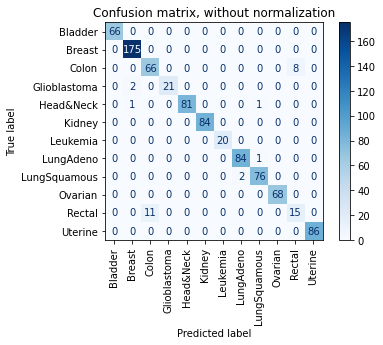

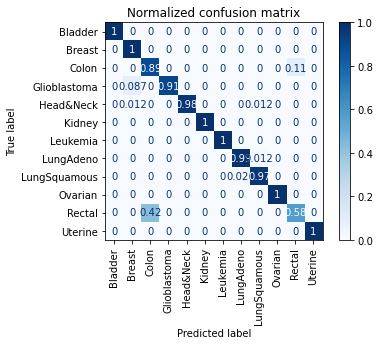

In [35]:
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]  
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=np.unique(Y),
                                 cmap=plt.cm.Blues,
                                 normalize=normalize,
                                xticks_rotation='vertical')
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()